# Chap.09 教師信号あり総合演習

## 9.2 練習問題：金融機関のキャンペーン分析

データ分析の方針検討

In [89]:
# EX.9-1
# 教師あり学習の分類

In [90]:
# EX.9-2
### 解答例
# ｙ列を予測する分類モデルを作ることにより、その顧客が購入してくれるかどうかが事前に分かる。
# また、特徴量にこちらからのアプローチ法を入れる事により、「この顧客の場合、こういうアプローチをとったら購入してくれる」というような営業の最適化を行う事が出来る


分析の実施

In [91]:
# ライブラリの準備
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [92]:
# EX.9-3 データを取得する
df = pd.read_csv('../support/datafiles/Bank.csv')
print(df.head(3))
df.shape

   id  age           job  marital  education default  amount housing loan  \
0   1   39   blue-collar  married  secondary      no  1756.0     yes   no   
1   2   51  entrepreneur  married    primary      no  1443.0      no   no   
2   3   36    management   single   tertiary      no   436.0      no   no   

    contact  day month    duration  campaign  previous  y  
0  cellular    3   apr  370.055237         1         0  1  
1  cellular   18   feb  233.998933        10         0  1  
2  cellular   13   apr         NaN         1         2  0  


(27128, 16)

In [93]:
# 文字列の列を抜き出す
str_col_name = [
    'job', 'default', 'marital', 'education', 'housing', 'loan', 'contact', 'month'
]
str_df = df[str_col_name]
# 抜き出した複数の列をまとめてダミー変数化する
str_df2 = pd.get_dummies(str_df, drop_first=True)
str_df2.head(3)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# 数値列を抜き出す
num_df = df.drop(str_col_name, axis=1)
# 「数値」列と「文字列」列を結合する
df2 = pd.concat([num_df, str_df2, str_df], axis=1)
print(df2.head(3))
df2.shape

   id  age  amount  day    duration  campaign  previous  y  job_blue-collar  \
0   1   39  1756.0    3  370.055237         1         0  1                1   
1   2   51  1443.0   18  233.998933        10         0  1                0   
2   3   36   436.0   13         NaN         1         2  0                0   

   job_entrepreneur  ...  month_oct  month_sep           job  default  \
0                 0  ...          0          0   blue-collar       no   
1                 1  ...          0          0  entrepreneur       no   
2                 0  ...          0          0    management       no   

   marital  education  housing  loan   contact  month  
0  married  secondary      yes    no  cellular    apr  
1  married    primary       no    no  cellular    feb  
2   single   tertiary       no    no  cellular    apr  

[3 rows x 48 columns]


(27128, 48)

In [95]:
df2.columns

Index(['id', 'age', 'amount', 'day', 'duration', 'campaign', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_yes', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'contact_sending _document',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'job', 'default', 'marital', 'education',
       'housing', 'loan', 'contact', 'month'],
      dtype='object')

In [96]:
# 「訓練データ&検証データ」と「テストデータ」に分割する
train_val, test = train_test_split(df2, test_size=0.1, random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


欠損値の確認

In [97]:
a = train_val.isnull().sum()
a[a > 0]

duration    6331
dtype: int64

In [98]:
# 「duration列」の中央値を平均値の確認
train_val['duration'].median(), train_val['duration'].mean()

(314.89135074820206, 318.08549081953703)

In [99]:
# とりあえず、中央値で欠損値を補完する
train_val2 = train_val.fillna(train_val.median())

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_27206/1584746183.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_val2 = train_val.fillna(train_val.median())


In [100]:
# 不均衡なデータであるか確認する
train_val2['y'].value_counts()

0    16601
1     7814
Name: y, dtype: int64

- 今回は不均衡データの分類。
  - モデル作成時にclass_weight="balanced"と指定する事で、不均衡データに対応したモデルにする。
  - class_weightを指定すると、通常より正解率は上がりにくい。

In [101]:
# すべての特徴量を利用してモデルを作成する
t = train_val2['y']
x = train_val2.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)

# 訓練データと検証データに分割する
x_train, x_val, y_train, y_val = train_test_split(
    x, t, test_size=0.2, random_state=13
)

#不均衡データに対応できるように、class_weight引数も設定
model = tree.DecisionTreeClassifier(
    max_depth=3, random_state=3, class_weight='balanced'
)
#class_weightを指定しないとちなみに正解率は0.7ぐらい
#model = tree.DecisionTreeClassifier(random_state=3,max_depth=5)

model.fit(x_train, y_train)
model.score(x_val, y_val)

0.6493958631988531

In [102]:
# learn関数を定義する
def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(
        x, t, test_size=0.2, random_state=13
    )
    datum = [x_train, x_val, y_train, y_val]
    #不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(
        max_depth=i, random_state=i, class_weight='balanced'
    )
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val, y_val)

    return train_score, val_score, model, datum

In [103]:
# 決定木の深さで正解率を調べる
for i in range(1, 20):
    s1, s2, model, datum = learn(x, t, i)
    print(f"{i}: {s1}, {s2}")

1: 0.6995187384804423, 0.6993651443784559
2: 0.6492422690968667, 0.6493958631988531
3: 0.6492422690968667, 0.6493958631988531
4: 0.7357669465492525, 0.7481056727421667
5: 0.7767765717796437, 0.7773909481875896
6: 0.80124923202949, 0.8023755887773909
7: 0.8224452181036248, 0.8095433135367602
8: 0.8448699569936514, 0.8238787630554987
9: 0.858386237968462, 0.8230595945115707
10: 0.8756399754249437, 0.829817734998976
11: 0.8987814867909072, 0.8363710833503993
12: 0.910147450337907, 0.8269506450952283
13: 0.9284251484742986, 0.8236739709195167
14: 0.943170182265001, 0.8124104034405079
15: 0.9587343845996313, 0.820397296743805
16: 0.9684620110587754, 0.8156870776162195
17: 0.9776264591439688, 0.8177349989760393
18: 0.9845893917673562, 0.8134343641204178
19: 0.9900163833708786, 0.8152774933442556


In [104]:
# 深さ11以降はvalが停滞するので過学習が発生ここでテストデータでチェック
model = tree.DecisionTreeClassifier(max_depth=11, random_state=11)
model.fit(x, t)
test2 = test.copy()
test2 = test2.fillna(train_val.median())

test_y = test2['y']
test_x = test2.drop(str_col_name, axis=1)
test_x = test_x.drop(['id', 'y', 'day'], axis=1)
model.score(test_x, test_y)

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_27206/3636510691.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test2 = test2.fillna(train_val.median())


0.8330261702911905

In [105]:
# 特徴量重要度の確認
# (連続量とダミー変数を比べると、連続量の方が重要度は高め出力されてしまう事に注意)
a = pd.Series(
    model.feature_importances_, index=x.columns
).sort_values(ascending=False)
# campaignやdurationが重要度が大きいと分かる
a[0:9]

duration                     0.529793
age                          0.143316
campaign                     0.103042
housing_yes                  0.064951
loan_yes                     0.041739
amount                       0.039681
previous                     0.015744
contact_sending _document    0.014536
month_aug                    0.002839
dtype: float64

durationの欠損値の処理

In [106]:
# durationに関係がありそうなものを見つけるためには7章の様に集計処理で判断したい。
# よって、集計処理の軸になるstr_dfの列名をいったん確認
print(str_df.columns)

Index(['job', 'default', 'marital', 'education', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')


In [107]:
for name in str_df.columns:
    print(train_val.groupby(name)['y'].mean())
    print("next=========")

job
admin.           0.304550
blue-collar      0.352886
entrepreneur     0.390453
housemaid        0.290043
management       0.307299
retired          0.369268
self-employed    0.301974
services         0.337611
student          0.166667
technician       0.307423
unemployed       0.241084
unknown          0.294118
Name: y, dtype: float64
next=========
default
no     0.321336
yes    0.249428
Name: y, dtype: float64
next=========
marital
divorced    0.334059
married     0.341211
single      0.269086
Name: y, dtype: float64
next=========
education
primary      0.351921
secondary    0.318327
tertiary     0.301592
unknown      0.354354
Name: y, dtype: float64
next=========
housing
no     0.217959
yes    0.400910
Name: y, dtype: float64
next=========
loan
no     0.300195
yes    0.424328
Name: y, dtype: float64
next=========
contact
cellular             0.277883
sending _document    0.416372
telephone            0.311842
Name: y, dtype: float64
next=========
month
apr    0.312070
aug    0.251

- housing ,loan, contactが関係してそう。
- ただ、contactにおいて、sending_documentは資料送付しかしていないのに接触時間が長いとはどういうことか？？
- 実際ならば、このデータはどう解釈すればいいのか実際の現場の人間に聞き取りをする必要があるが、今回は不可能なのでこのまま分析を進める。

In [108]:
print(pd.pivot_table(
    train_val, index="housing", columns="loan", values="duration"
), "\n")

print(pd.pivot_table(
    train_val, index="housing", columns="contact", values="duration"
), "\n")

print(pd.pivot_table(
    train_val,index="loan", columns="contact", values="duration"
))

loan             no         yes
housing                        
no       237.256887  301.180261
yes      332.635840  439.472217 

contact    cellular  sending _document   telephone
housing                                           
no       249.821962         249.179202  272.785529
yes      348.532350         349.179816  368.638141 

contact    cellular  sending _document   telephone
loan                                              
no       297.588613         314.969378  304.960446
yes      375.465455         400.911698  379.000771


- どれも強く関係してそうに見える。今回は2×2で処理しやすい。loan×housingを採用する

In [109]:
def nan_fill(train_val):
    # train_valを変えたくないので、py基本文法のcopyメソッドでコピーを作って
    # train_val2に代入
    train_val2 = train_val.copy()

    isnull = train_val['duration'].isnull()

    #housing = yesの処理
    train_val2.loc[
        (isnull) & (train_val2['housing'] == 'yes') 
        & (train_val2['loan'] == 'yes'), 'duration' 
    ] = 439
    train_val2.loc[
        (isnull) & (train_val2['housing'] == 'yes') 
        & (train_val2['loan'] == 'no'),'duration' 
    ] = 332

    #housing = noの処理
    train_val2.loc[
        (isnull) & (train_val2['housing'] == 'no') 
        & (train_val2['loan'] == 'yes'),'duration' 
    ] = 301
    train_val2.loc[
        (isnull) & (train_val2['housing'] == 'no') 
        & (train_val2['loan'] == 'no'),'duration' 
    ] = 237
    
    return train_val2

train_val2 = nan_fill(train_val)

In [110]:
# 特徴量重要度が大きかった項目とyの関係
train_val2.groupby('y')['duration'].median()

y
0    263.575464
1    346.960871
Name: duration, dtype: float64

In [111]:
train_val2.groupby('y')['amount'].median()

y
0    449.0
1    449.0
Name: amount, dtype: float64

In [112]:
train_val2.groupby('y')['campaign'].median()

y
0    2.0
1    3.0
Name: campaign, dtype: float64

In [113]:
train_val2.groupby('y')['age'].median()

y
0    38.0
1    41.0
Name: age, dtype: float64

- durationは値が大きいほど、y=1になりやすい傾向がありそう

In [114]:
#ここでいったん、learn関数で分析
t = train_val2['y']
x = train_val2.drop(str_col_name, axis=1)
x =x.drop(['id', 'y', 'day'], axis=1)
#x =train_val2[xcol]

for i in range(1, 20):
    s1, s2, model, datum = learn(x, t, i)
    print(f"{i} {s1}, {s2}")

1 0.7462113454843334, 0.7511775547818964
2 0.7462113454843334, 0.7511775547818964
3 0.7507167724759369, 0.7554781896375179
4 0.7481056727421667, 0.7569117345893918
5 0.7746262543518329, 0.7751382346917879
6 0.7780565226295311, 0.7712471841081302
7 0.8182469793159942, 0.8117960270325619
8 0.8275138234691788, 0.8077001843129223
9 0.8483514233053451, 0.8273602293671923
10 0.8692402211755068, 0.8335039934466516
11 0.8782510751587139, 0.8251075158713905
12 0.8999590415728036, 0.8261314765513005
13 0.914294491091542, 0.8281793979111202
14 0.9298074953921769, 0.8220356338316609
15 0.9457812819987712, 0.8220356338316609
16 0.9606287118574647, 0.820602088879787
17 0.9706123284865861, 0.8171206225680934
18 0.9785992217898832, 0.8187589596559492
19 0.9862277288552119, 0.8199877124718411


In [115]:
# どのような間違い方をしているのか確認
s1, s2, model, datum = learn(x, t, 10)

# 訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model, datum, flag=False):
    if flag:
        pre = model.predict(datum[0])
        y_val = datum[2]
    else:
        pre = model.predict(datum[1])
        y_val = datum[3]
    data = {
        "pred": pre,
        "true": y_val
    }
    tmp = pd.DataFrame(data)
    return tmp, pd.pivot_table(tmp, index="true", columns="pred", values="true", aggfunc=len)


tmp, a = syuukei(model, datum, False)
a

pred,0,1
true,,
0,2796,587
1,226,1274


/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_27206/360127745.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  [true_df.mean()["age":], false_df.mean()["age":]], axis=1


Int64Index([ 8008,  5734,  1594,  2167, 10468, 26200,  7851,  4695, 24120,
            18766,
            ...
            14655,  5003,  4196, 17968, 13960,  1548,   508,  7200,  9861,
            20515],
           dtype='int64', length=2796)

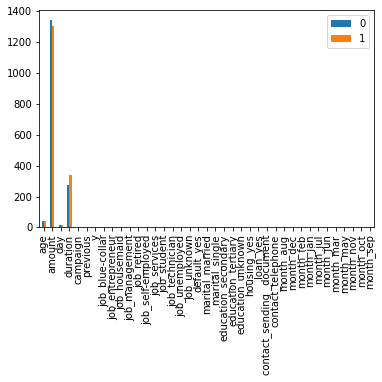

In [116]:
# 本当はｙ＝0の中で、正確に予測された人と謝った予測をされた人でどういう傾向があるか分析

false = tmp.loc[(tmp['pred'] == 1) & (tmp['true'] == 0)].index
true = tmp.loc[(tmp['pred'] == 0) & (tmp['true'] == 0)].index

true_df = train_val2.loc[true]
false_df = train_val2.loc[false]

pd.concat(
    [true_df.mean()["age":], false_df.mean()["age":]], axis=1
).plot(kind="bar")
true

             id       age    amount       day  duration  campaign  previous  \
8008  -0.707324 -0.276656 -0.428811  0.742736 -0.102910 -0.238912 -0.227081   
5734  -0.997343  1.138307 -0.502345 -0.814295  0.602638 -0.557919 -0.227081   
1594  -1.525346 -0.653980  0.232995  1.581138 -0.851713 -0.238912 -0.227081   
2167  -1.452267 -0.370987 -0.213200  1.820681 -0.521325 -0.238912 -0.227081   
10468 -0.393584 -0.276656 -0.429810 -0.934067 -0.853755 -0.557919  0.162997   
...         ...       ...       ...       ...       ...       ...       ...   
1548  -1.531213 -0.182325 -0.406518  1.700910  0.427760 -0.557919 -0.227081   
508   -1.663851 -0.748311 -0.533290 -0.934067 -0.851713 -0.557919 -0.227081   
7200  -0.810374 -1.031304  0.011727  0.622965 -0.177410 -0.238912 -0.227081   
9861  -0.470999 -0.370987 -0.412508  0.143878 -1.088134  0.399101 -0.227081   
20515  0.887779  0.666653  0.128184 -0.694524  0.783834 -0.557919  0.162997   

              y  job_blue-collar  job_entrepreneur 

<AxesSubplot:>

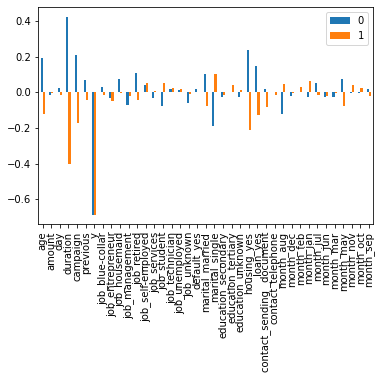

In [117]:
# 値にばらつきが大きいので、標準化してもう一度グラフ化
sc = StandardScaler()
tmp2 = train_val2.drop(str_col_name, axis=1)
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data, columns=tmp2.columns, index=tmp2.index)

true_df = sc_df.loc[true]
false_df = sc_df.loc[false]
print(true_df)
temp2 = pd.concat([false_df.mean()["age":], true_df.mean()["age":]], axis=1)
temp2.plot(kind="bar")


- 青色の０は誤分類、オレンジ１は正解のデータ
- durationと housing_yesが大きく異なる
  - 実際はy=0の人で、 durationが大きい人は誤分類しやすい
  - 実際はy=0の人で、 housingが大きい人は誤分類しやすい


- 事前に、durationが大きい人はy=1になりやすいということは分かっているので、「こういう人はy=0になりやすい」という
- 特徴量を見つけ出して、特徴量×durationという特徴量を作って、durationに重み付けをする列を作れば正解率があがるのではないか？ 
- 
- 続きは3部に譲ってここでテストデータ評価を行う

In [118]:
model_tree = tree.DecisionTreeClassifier(
    max_depth=10, random_state=10, class_weight="balanced"
)
model_tree.fit(x, t)

test2 = nan_fill(test)
t = test2['y']
x = test2.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)
model_tree.score(x, t)

0.815333579063767